In [24]:
from tensorflow.keras.models import load_model
from tensorflow.keras import models
import tensorflow as tf
import os
from os.path import join
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [13]:
class ImgBatchGenTest(tf.keras.utils.Sequence):
    def __init__(self, img_dir, batch_size=32, img_size=None):
        self.bacth_size = batch_size
        files = os.listdir(img_dir)
        self.files = [(join(img_dir, f), f) for f in files if f.endswith('.jpg')]
        
        self.img_size=img_size
        
    def __len__(self):
        return int(np.ceil(len(self.files)/self.bacth_size))

    def __getitem__(self, index):
        images = []
        labels = []

        for file, filename in self.files[index*self.bacth_size:(index+1)*self.bacth_size]:
            img = cv2.imread(file, 0)
            if img is None:
                continue
            if self.img_size is not None:
                img = cv2.resize(img,(self.img_size, self.img_size), interpolation = cv2.INTER_CUBIC)
            images.append(img)
            labels.append(filename)
  

        x = np.array(images)[:, :, :, np.newaxis].astype(np.float32) / 255.0
        y = np.array(labels)

        return x, y
    

In [3]:
model = load_model('model5_best')

In [4]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 366, 366, 32)      1600      
_________________________________________________________________
batch_normalization (BatchNo (None, 366, 366, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 366, 366, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 183, 183, 64)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 183, 183, 64)      256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 183, 183, 64)      36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 183, 183, 64)      2

In [5]:
for layer in model.layers:
    print(layer.get_config)

<bound method RevivedLayer.get_config of <tensorflow.python.keras.saving.saved_model.load.Conv2D object at 0x000001D10AA4DCC8>>
<bound method RevivedLayer.get_config of <tensorflow.python.keras.saving.saved_model.load.BatchNormalization object at 0x000001D10AA65708>>
<bound method RevivedLayer.get_config of <tensorflow.python.keras.saving.saved_model.load.Conv2D object at 0x000001D10AA69348>>
<bound method RevivedLayer.get_config of <tensorflow.python.keras.saving.saved_model.load.MaxPooling2D object at 0x000001D10AA69D88>>
<bound method RevivedLayer.get_config of <tensorflow.python.keras.saving.saved_model.load.BatchNormalization object at 0x000001D10AA6C848>>
<bound method RevivedLayer.get_config of <tensorflow.python.keras.saving.saved_model.load.Conv2D object at 0x000001D10AA70548>>
<bound method RevivedLayer.get_config of <tensorflow.python.keras.saving.saved_model.load.BatchNormalization object at 0x000001D10AA70FC8>>
<bound method RevivedLayer.get_config of <tensorflow.python.ke

In [10]:
feature_model = models.Model(inputs=model.input, outputs=model.layers[-2].output)

In [18]:
test_batchgen = ImgBatchGenTest('data/test', 32, img_size=None)

(32, 366, 366, 1) (32,)
acd_127.jpg


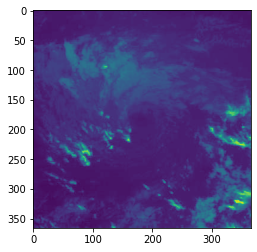

In [25]:
test_im, test_fname = test_batchgen[0]
print(test_im.shape, test_fname.shape)
plt.imshow(test_im[4])
print(test_fname[4])

In [30]:
predictions_model = model.predict(test_batchgen)

In [27]:
preditions_feature_model = feature_model.predict(test_batchgen)

In [31]:
print(preditions_feature_model.shape)
print(predictions_model.shape)

(44377, 32)
(44377, 1)
